#### Tanmay Bhatt
011499072
CMPE 258
Assignment 2

## Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import minmax_scale as scale
from sklearn.model_selection import train_test_split
from __future__ import division
import tensorflow as tf
from sklearn.metrics import mean_squared_error

### Function for plotting data

In [2]:
def plot_data(X_test,Y_test,Y_pred):
    result = sorted(zip(X_test, Y_pred))
    X_sorted = []
    Y_pred_sorted = [] 
    for i in range(0,len(result)):
        X_sorted.append(result[i][0])
        Y_pred_sorted.append(result[i][1])
    plt.scatter(X,Y)
    plt.plot(X_sorted,Y_pred_sorted)

### Function for Min-Max Normalization

In [3]:
def minmax_normalize(X_new):
    X_new_min = X_new.min()
    X_new_max = X_new.max()
    i = 0
    for i in range(0,len(X_new)):
        X_new[i] =(X_new[i] - X_new_min) /(X_new_max - X_new_min)
    return X_new

### Function definitions for n order regressions without penalty

In [4]:
def calculate_cost():
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    return float(result)

def cost_derivative():
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    return result

def calculate_weights(rate):
    global W_mat
    W_mat = W_mat - rate*cost_derivative()

# 1 (30pts). Polynomial regression / overfitting / regularization Using Jupyter notebook, load the data (ex2data1.csv).

In [5]:
data = pd.read_csv('./ex2data1.csv', header=None)
data.shape

(31, 2)

In [6]:
data = data.drop(data.index[0]) # Removing 0th row of header x,y 
data = data.reset_index(drop=True)
data = data.astype(float)

In [7]:
X = data[0]
#X = minmax_normalize(np.power(X,2))
Y = data[1]
m = len(data)
print m

30


In [8]:
temp = pd.Series( (1 for i in range(0,m)) )

## 1-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).
Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

In [9]:
X_mat = np.asmatrix(np.column_stack((temp,X)))
W_mat = np.asmatrix(np.array([0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.01,0.1,0.5]#[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [10]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0.])).T
    count = 0
    max_count = 1000000
    current_cost = calculate_cost()
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
        if(count % 100000 == 0):
            print "Iterations : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "RMSE : %f" % sqrt(calculate_cost())
    print "\n"

Iterations : 12551
Last Cost : 0.226805
Second Last Cost : 0.226805 
Learning rate : 0.010000 
w0 : 1.075811 
w1 : -1.188720
RMSE : 0.476240


Iterations : 1345
Last Cost : 0.226805
Second Last Cost : 0.226805 
Learning rate : 0.100000 
w0 : 1.075811 
w1 : -1.188720
RMSE : 0.476240


Iterations : 277
Last Cost : 0.226805
Second Last Cost : 0.226805 
Learning rate : 0.500000 
w0 : 1.075811 
w1 : -1.188720
RMSE : 0.476240




In [11]:
def predict(x):
    return float(W_mat[0]) + float(W_mat[1])*x

In [12]:
Y_pred = []
for x in X:
    Y_pred.append(predict(x))

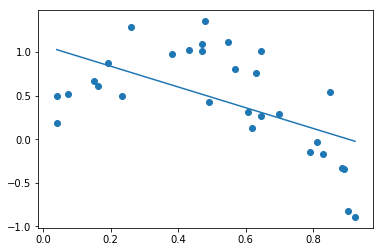

In [13]:
plot_data(X,Y,Y_pred)

## Best Result with Learning rate : 0.5

Iterations : 277 <br />
Last Cost : 0.226805<br />
Second Last Cost : 0.226805<br /> 
Learning rate : 0.500000 <br />
w0 : 1.075811 <br />
w1 : -1.188720<br />
RMSE : 0.476240<br />


## 1-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).
Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).
Note: Do not forget feature normalization.


In [14]:
X_new = minmax_normalize(np.power(X,2))

In [15]:
X_mat = np.asmatrix(np.column_stack((temp,X,X_new)))
W_mat = np.asmatrix(np.array([0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.1,0.5,0.6]#[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [16]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0.])).T
    count = 0
    max_count = 1000000
    current_cost = calculate_cost()
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
        if(count % 100000 == 0):
            print "Iterations : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "RMSE : %f" % sqrt(calculate_cost())
    print "\n"

Iterations : 25214
Last Cost : 0.081624
Second Last Cost : 0.081624 
Learning rate : 0.100000 
w0 : 0.189802 
w1 : 4.144446
w2 : -4.674276
RMSE : 0.285699


Iterations : 5381
Last Cost : 0.081624
Second Last Cost : 0.081624 
Learning rate : 0.500000 
w0 : 0.189801 
w1 : 4.144448
w2 : -4.674278
RMSE : 0.285699


Iterations : 4556
Last Cost : 0.081624
Second Last Cost : 0.081624 
Learning rate : 0.600000 
w0 : 0.189801 
w1 : 4.144449
w2 : -4.674278
RMSE : 0.285699




## Best Result with Learning rate : 0.6 

Iterations : 4556 <br />
Last Cost : 0.081624<br />
Second Last Cost : 0.081624 <br />
Learning rate : 0.600000 <br />
w0 : 0.189801 <br />
w1 : 4.144449<br />
w2 : -4.674278<br />
RMSE : 0.285699<br />

In [17]:
def predict(x,x_new):
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x_new

In [18]:
Y_pred = []
for x,x_new in zip(X,X_new):
    Y_pred.append(predict(x,x_new))

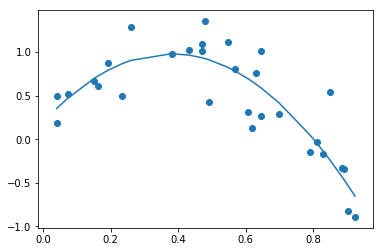

In [19]:
plot_data(X,Y,Y_pred)

## 1-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).
Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).
Note: Do not forget feature normalization.


In [20]:
X2_new = minmax_normalize(np.power(X,2))
X3_new = minmax_normalize(np.power(X,3))
X4_new = minmax_normalize(np.power(X,4))

In [21]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.5]#[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [22]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0.])).T
    count = 0
    max_count = 100000
    current_cost = calculate_cost()
    new_cost = -878987788
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
        if(count % 100000 == 0):
            print "Iterations : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f " % W_mat[2]
    print "w3 : %f " % W_mat[3]
    print "w4 : %f " % W_mat[4]
    print "RMSE : %f" % sqrt(calculate_cost())
    print "\n"

Iterations : 100000
Iterations : 200000
Iterations : 300000
Iterations : 400000
Iterations : 500000
Iterations : 600000
Iterations : 700000
Iterations : 800000
Iterations : 900000
Iterations : 1000000
Iterations : 1000000
Last Cost : 0.081329
Second Last Cost : 0.081329 
Learning rate : 0.500000 
w0 : 0.102319 
w1 : 5.427704
w2 : -8.801475 
w3 : 5.232154 
w4 : -2.203128 
RMSE : 0.285183




In [23]:
def predict(x,x2_new,x3_new,x4_new):
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new

In [24]:
Y_pred = []
for x,x2_new,x3_new,x4_new in zip(X,X2_new,X3_new,X4_new):
    Y_pred.append(predict(x,x2_new,x3_new,x4_new))

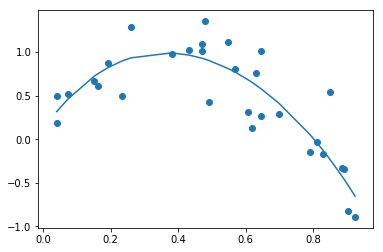

In [25]:
plot_data(X,Y,Y_pred)

## Best Result with Learning rate : 0.5 

Iterations : 1000000 <br/>
Last Cost : 0.081329<br/>
Second Last Cost : 0.081329<br/> 
Learning rate : 0.500000 <br/>
w0 : 0.102319 <br/>
w1 : 5.427704<br/>
w2 : -8.801475 <br/>
w3 : 5.232154 <br/>
w4 : -2.203128 <br/>
RMSE : 0.285183<br/>

## 1-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).
Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).
Note: Do not forget feature normalization.


In [26]:
X2_new = minmax_normalize(np.power(X,2))
X3_new = minmax_normalize(np.power(X,3))
X4_new = minmax_normalize(np.power(X,4))
X5_new = minmax_normalize(np.power(X,5))
X6_new = minmax_normalize(np.power(X,6))
X7_new = minmax_normalize(np.power(X,7))
X8_new = minmax_normalize(np.power(X,8))
X9_new = minmax_normalize(np.power(X,9))
X10_new = minmax_normalize(np.power(X,10))
X11_new = minmax_normalize(np.power(X,11))
X12_new = minmax_normalize(np.power(X,12))
X13_new = minmax_normalize(np.power(X,13))
X14_new = minmax_normalize(np.power(X,14))
X15_new = minmax_normalize(np.power(X,15))
X16_new = minmax_normalize(np.power(X,16))

In [27]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates =[0.33]#[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [28]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
    count = 0
    max_count = 100000
    current_cost = calculate_cost()
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
        if(count % 100000 == 0):
            print "Iterations : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "RMSE : %f" % sqrt(calculate_cost())
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "w3 : %f" % W_mat[3]
    print "w4 : %f" % W_mat[4]
    print "w5 : %f" % W_mat[5]
    print "w6 : %f" % W_mat[6]
    print "w7 : %f" % W_mat[7]
    print "w8 : %f" % W_mat[8]
    print "w9 : %f" % W_mat[9]
    print "w10 : %f" % W_mat[10]
    print "w11 : %f" % W_mat[11]
    print "w12 : %f" % W_mat[12]
    print "w13 : %f" % W_mat[13]
    print "w14 : %f" % W_mat[14]
    print "w15 : %f" % W_mat[15]
    print "w16 : %f" % W_mat[16]
    print "\n"

Iterations : 100000
Iterations : 200000
Iterations : 300000
Iterations : 400000
Iterations : 500000
Iterations : 600000
Iterations : 700000
Iterations : 800000
Iterations : 900000
Iterations : 1000000
Iterations : 1000000
Last Cost : 0.068844
Second Last Cost : 0.068844 
Learning rate : 0.330000 
RMSE : 0.262381
w0 : 0.255503 
w1 : 2.653551
w2 : 1.030015
w3 : -3.394612
w4 : -3.963081
w5 : -2.337852
w6 : -0.177298
w7 : 1.695582
w8 : 2.883656
w9 : 3.229226
w10 : 2.762056
w11 : 1.664585
w12 : 0.229127
w13 : -1.186982
w14 : -2.200812
w15 : -2.434498
w16 : -1.536927




In [29]:
def predict(x,x2_new,x3_new,x4_new,x5_new,x6_new,x7_new,x8_new,x9_new,x10_new,x11_new,x12_new,x13_new,x14_new,x15_new,x16_new): 
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new + float(W_mat[5])*x5_new + float(W_mat[6])*x6_new + float(W_mat[7])*x7_new + float(W_mat[8])*x8_new + float(W_mat[9])*x8_new + float(W_mat[10])*x10_new + float(W_mat[11])*x11_new + float(W_mat[12])*x12_new + float(W_mat[13])*x13_new + float(W_mat[14])*x14_new + float(W_mat[15])*x15_new + float(W_mat[16])*x16_new

In [30]:
Y_pred = []
for x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16 in zip(X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new):
    Y_pred.append(predict(x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16))

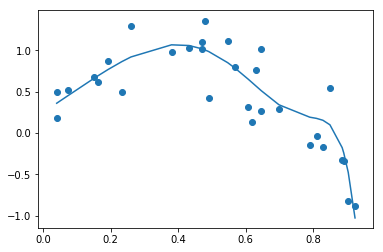

In [31]:
plot_data(X,Y,Y_pred)

## Best Result with Learning rate : 0.6 

Iterations : 1000000 <br />
Last Cost : 0.068844<br />
Second Last Cost : 0.068844<br /> 
Learning rate : 0.330000 <br />
RMSE : 0.262381<br />

## 1-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization (matrix form, gradient descent method).
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE)
Note: Do not forget feature normalization.


In [32]:
def calculate_cost(y):
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    result += (y/m*np.sum(np.power(W_mat,2)))
    return float(result)

def cost_derivative(y):
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    result += 2 * (y/m*np.sum(W_mat))
    return result

def calculate_weights(rate,y):
    global W_mat
    W_mat = W_mat - rate*cost_derivative(y)

In [33]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.38]#[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]
lambdas = [0.00001]#1,10]

In [34]:
for rate  in learning_rates:
    for y in lambdas:
        W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
        count = 0
        max_count = 10000
        current_cost = calculate_cost(y)
        new_cost = 0
        while new_cost < current_cost and count < max_count:
            current_cost = calculate_cost(y)
            calculate_weights(rate,y)
            new_cost = calculate_cost(y)
            count += 1
            if(count % 1000 == 0):
                print "counter : %d" % count
        print "Penalty : %f" % y
        print "Iterations : %d" % count
        print "Last Cost : %lf" % new_cost
        print "Second Last Cost : %f " % current_cost 
        print "Learning rate : %f " % rate
        print "RMSE : %f" % sqrt(calculate_cost(y))
        print "w0 : %f " % W_mat[0]
        print "w1 : %f" % W_mat[1]
        print "w2 : %f" % W_mat[2]
        print "w3 : %f" % W_mat[3]
        print "w4 : %f" % W_mat[4]
        print "w5 : %f" % W_mat[5]
        print "w6 : %f" % W_mat[6]
        print "w7 : %f" % W_mat[7]
        print "w8 : %f" % W_mat[8]
        print "w9 : %f" % W_mat[9]
        print "w10 : %f" % W_mat[10]
        print "w11 : %f" % W_mat[11]
        print "w12 : %f" % W_mat[12]
        print "w13 : %f" % W_mat[13]
        print "w14 : %f" % W_mat[14]
        print "w15 : %f" % W_mat[15]
        print "w16 : %f" % W_mat[16]
        print "\n"
    print "\n********************\n"

counter : 1000
counter : 2000
counter : 3000
counter : 4000
counter : 5000
counter : 6000
counter : 7000
counter : 8000
counter : 9000
counter : 10000
Penalty : 0.000010
Iterations : 10000
Last Cost : 0.069395
Second Last Cost : 0.069395 
Learning rate : 0.380000 
RMSE : 0.263429
w0 : 0.173201 
w1 : 3.806504
w2 : -1.653442
w3 : -3.045987
w4 : -2.229038
w5 : -0.844356
w6 : 0.388338
w7 : 1.233586
w8 : 1.666024
w9 : 1.738947
w10 : 1.526791
w11 : 1.101924
w12 : 0.526626
w13 : -0.148495
w14 : -0.883588
w15 : -1.647884
w16 : -2.417959



********************



In [35]:
def predict(x,x2_new,x3_new,x4_new,x5_new,x6_new,x7_new,x8_new,x9_new,x10_new,x11_new,x12_new,x13_new,x14_new,x15_new,x16_new): 
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new + float(W_mat[5])*x5_new + float(W_mat[6])*x6_new + float(W_mat[7])*x7_new + float(W_mat[8])*x8_new + float(W_mat[9])*x8_new + float(W_mat[10])*x10_new + float(W_mat[11])*x11_new + float(W_mat[12])*x12_new + float(W_mat[13])*x13_new + float(W_mat[14])*x14_new + float(W_mat[15])*x15_new + float(W_mat[16])*x16_new

In [36]:
Y_pred = []
for x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16 in zip(X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new):
    Y_pred.append(predict(x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16))

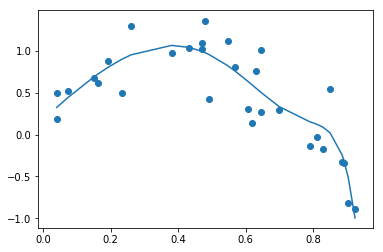

In [37]:
plot_data(X,Y,Y_pred)

## Best Result with Learning rate : 0.6 

Iterations : 10000 <br />
Last Cost : 0.069395<br />
Second Last Cost : 0.069395<br /> 
Learning rate : 0.380000 <br />
RMSE : 0.263429<br />

## 1-6. Fit the data using 16th order polynomial regression model with scikit-learn Ridge model.
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE)


In [60]:
X_mat = np.asmatrix(np.column_stack((X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
Y_mat = np.asmatrix((np.row_stack((Y))))
lambdas = [0.000010,0.0001,0.1,1,10]

For Penalty : 0.000010
RMSE is 0.262312 

For Penalty : 0.000100
RMSE is 0.262423 

For Penalty : 0.100000
RMSE is 0.303637 

For Penalty : 1.000000
RMSE is 0.327256 

For Penalty : 10.000000
RMSE is 0.350926 



Text(0.5,1,u'Weight Coefficients')

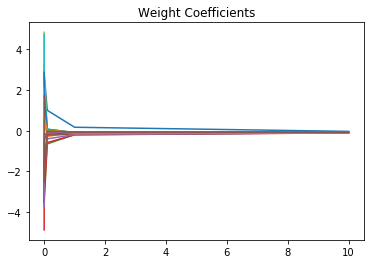

In [61]:
Weights = []
for y in lambdas:
    ridge_model = Ridge(alpha=y)
    ridge_model.fit(X_mat,Y)
    Y_pred = ridge_model.predict(X_mat)
    print "For Penalty : %f" % y
    print "RMSE is %f " % sqrt(mean_squared_error(Y_mat,Y_pred))
    Weights.append(ridge_model.coef_)
    print ""

plt.plot(lambdas,Weights)
plt.title("Weight Coefficients")

In [58]:
print "Optimized weights"
print "w0 : %f" % ridge_model.intercept_
print "w1 : %f" % ridge_model.coef_[0]
print "w2 : %f" % ridge_model.coef_[1]
print "w3 : %f" % ridge_model.coef_[2]
print "w4 : %f" % ridge_model.coef_[3]
print "w5 : %f" % ridge_model.coef_[4]
print "w6 : %f" % ridge_model.coef_[5]
print "w7 : %f" % ridge_model.coef_[6]
print "w8 : %f" % ridge_model.coef_[7]
print "w9 : %f" % ridge_model.coef_[8]
print "w10 : %f" % ridge_model.coef_[9]
print "w11 : %f" % ridge_model.coef_[10]
print "w12 : %f" % ridge_model.coef_[11]
print "w13 : %f" % ridge_model.coef_[12]
print "w14 : %f" % ridge_model.coef_[13]
print "w15 : %f" % ridge_model.coef_[14]
print "w16 : %f" % ridge_model.coef_[15]

Optimized weights
w0 : 0.247933
w1 : 2.817425
w2 : 0.210606
w3 : -2.333924
w4 : -3.149074
w5 : -3.031167
w6 : -1.741198
w7 : 0.662601
w8 : 3.242688
w9 : 4.841123
w10 : 4.729656
w11 : 2.868442
w12 : -0.130163
w13 : -3.170700
w14 : -4.870423
w15 : -3.731855
w16 : 1.724302


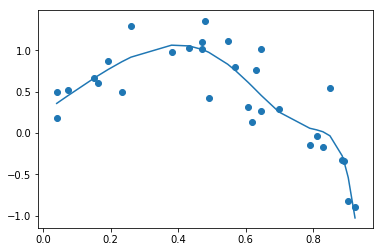

In [59]:
plot_data(X,Y,Y_pred.T)

## Best result achieved with Penalty: 0.00001

For Penalty : 0.000010 <br />
RMSE is 0.262312 <br />

## 1-7. Fit the data using 16th order polynomial regression model with scikit-learn Lasso model.
You need to try at least 3 different L1 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE)


In [78]:
X_mat = np.asmatrix(np.column_stack((X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
Y_mat = np.asmatrix((np.row_stack((Y))))
lambdas = [0.00001,0.001,0.01,0.1,0.5,1]

For Penalty : 0.000010
RMSE is 0.267002 

For Penalty : 0.001000
RMSE is 0.290611 

For Penalty : 0.010000
RMSE is 0.331643 

For Penalty : 0.100000
RMSE is 0.462805 

For Penalty : 0.500000
RMSE is 0.577255 

For Penalty : 1.000000
RMSE is 0.577255 



Text(0.5,1,u'Weight Coefficients')

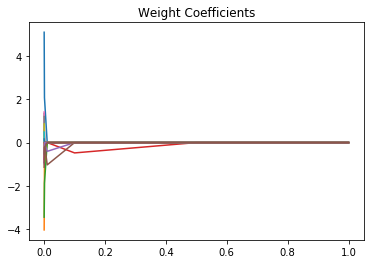

In [79]:
Weights = []
for y in lambdas:
    lasso_model = Lasso(alpha=y)
    lasso_model.fit(X_mat,Y)
    Y_pred = lasso_model.predict(X_mat)
    Weights.append(lasso_model.coef_)
    print "For Penalty : %f" % y
    print "RMSE is %f " % sqrt(mean_squared_error(Y_mat,Y_pred))
    print ""
plt.plot(lambdas,Weights)
plt.title("Weight Coefficients")

In [75]:
print "Optimized weights"
print "w0 : %f" % lasso_model.intercept_
print "w1 : %f" % lasso_model.coef_[0]
print "w2 : %f" % lasso_model.coef_[1]
print "w3 : %f" % lasso_model.coef_[2]
print "w4 : %f" % lasso_model.coef_[3]
print "w5 : %f" % lasso_model.coef_[4]
print "w6 : %f" % lasso_model.coef_[5]
print "w7 : %f" % lasso_model.coef_[6]
print "w8 : %f" % lasso_model.coef_[7]
print "w9 : %f" % lasso_model.coef_[8]
print "w10 : %f" % lasso_model.coef_[9]
print "w11 : %f" % lasso_model.coef_[10]
print "w12 : %f" % lasso_model.coef_[11]
print "w13 : %f" % lasso_model.coef_[12]
print "w14 : %f" % lasso_model.coef_[13]
print "w15 : %f" % lasso_model.coef_[14]
print "w16 : %f" % lasso_model.coef_[15]

Optimized weights
w0 : 0.066560
w1 : 5.111229
w2 : -4.046053
w3 : -3.454817
w4 : -0.913061
w5 : 0.577025
w6 : 1.353447
w7 : 1.424065
w8 : 1.206896
w9 : 0.864756
w10 : 0.488026
w11 : 0.164971
w12 : -0.013095
w13 : -0.521554
w14 : -0.772556
w15 : -0.977965
w16 : -1.140289


## Best result achieved with Penalty: 0.00001

For Penalty : 0.000010 <br />
RMSE is 0.267002 <br />

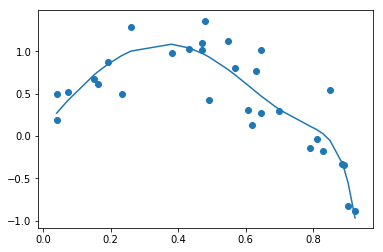

In [76]:
plot_data(X,Y,Y_pred)

# 2 (30pts). Polynomial regression with train/validation/test
Using Jupyter notebook, load the data (ex2data2.csv).
The first column is the size of the house (in square feet), the second column is the price of the house.
You need to split the data into training/validation/testing data set as 60% / 20% / 20%.
Please use np.random.seed(1) to have consistent data for evaluation.

In [158]:
data = pd.read_csv('./ex2data2.csv', header=None)
data.shape

(5405, 2)

In [159]:
data = data.drop(data.index[0]) # Removing 0th row of header x,y 
data = data.reset_index(drop=True)
data = data.astype(float)

In [160]:
X = data[0]
#X = minmax_normalize(X)
Y = data[1]
m = len(data)

In [161]:
temp = pd.Series( (1 for i in range(0,m)) )

In [162]:
X_mat = np.asmatrix(np.column_stack((temp,X)))
W_mat = np.asmatrix(np.array([0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.0000001]

In [163]:
def calculate_cost(X_mat,Y_mat):
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    return float(result)

def cost_derivative(X_mat,Y_mat):
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    return result

def calculate_weights(rate,X_mat,Y_mat):
    global W_mat
    W_mat = W_mat - rate*cost_derivative(X_mat,Y_mat)

## Splitting data into Training, Validation and Testing sets

In [164]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

## 2-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).
Plot the training data with the fitted line. Using the optimized weights, please calculated Root Mean Squared Error (RMSE) of training and testing data.

In [165]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0.])).T
    count = 0
    max_count = 100000
    current_cost = calculate_cost(X_train,Y_train)
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(X_train,Y_train)
        calculate_weights(rate,X_train,Y_train)
        new_cost = calculate_cost(X_train,Y_train)
        count += 1
        if(count % 100000 == 0):
            print "counter : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "Training RMSE : %lf" % sqrt(calculate_cost(X_train,Y_train))
    print "Validation RMSE : %lf" % sqrt(calculate_cost(X_val,Y_val))
    print "\n"

counter : 100000
Iterations : 100000
Last Cost : 40629415125.450859
Second Last Cost : 40629415133.811310 
Learning rate : 0.000000 
w0 : -91.426295 
w1 : 263.655422
Training RMSE : 201567.395988
Validation RMSE : 134104.927408




In [166]:
print "Testing RMSE : %f" % sqrt(calculate_cost(X_test,Y_test)) 

Testing RMSE : 118992.237409


In [167]:
def predict(x):
    return float(W_mat[0]) + float(W_mat[1])*x
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
Y_pred = []
for x in X_train_list:
    Y_pred.append(predict(x))

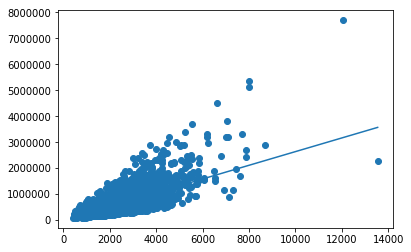

In [168]:
plot_data(X_train_list,Y_train_list,Y_pred)

## Best result achieved with Penalty: 0.00001

Iterations : 1000000 <br / >
Last Cost : 40622028972.297035<br / >
Second Last Cost : 40622028980.352150<br / > 
Learning rate : 0.0000001 <br / >
w0 : -906.738822 <br / >
w1 : 263.976415<br / >
Training RMSE : 201549.073360<br / >
Validation RMSE : 134074.362989<br / >
Testing RMSE : 118975.343224<br / >

## 2-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).
Plot the training data with the fitted line. Using the optimized weights, please calculated Root Mean Squared Error (RMSE) of training and testing data.
Note: Do not forget feature normalization.


In [173]:
X = minmax_normalize(X)
X_new = np.power(X,2)

In [177]:
X_mat = np.asmatrix(np.column_stack((temp,X,X_new)))
W_mat = np.asmatrix(np.array([0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.1]

In [178]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [179]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0.])).T
    count = 0
    max_count = 100000
    current_cost = calculate_cost(X_train,Y_train)
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(X_train,Y_train)
        calculate_weights(rate,X_train,Y_train)
        new_cost = calculate_cost(X_train,Y_train)
        count += 1
        if(count % 100000 == 0):
            print "counter : %d" % count
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "Training RMSE : %lf" % sqrt(calculate_cost(X_train,Y_train))
    print "Validation RMSE : %lf" % sqrt(calculate_cost(X_val,Y_val))
    print "\n"

counter : 100000
Iterations : 100000
Last Cost : 39977563876.035477
Second Last Cost : 39977563893.283493 
Learning rate : 0.100000 
w0 : 125936.813323 
w1 : 2997187.284412
w2 : 1771899.453754
Training RMSE : 199943.901823
Validation RMSE : 126124.211292




In [180]:
print "Testing RMSE : %f" % sqrt(calculate_cost(X_test,Y_test)) 

Testing RMSE : 116012.280498


In [181]:
def predict(x,x_new):
    return float(W_mat[0]) + float(W_mat[1])*x + + float(W_mat[2])*x_new
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
Y_pred = []
for x,x_new in zip(X_train_list,np.power(X_train_list,2)):
    Y_pred.append(predict(x,x_new))

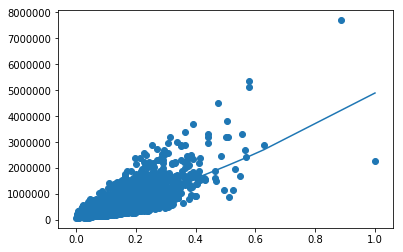

In [182]:
plot_data(X_train_list,Y_train_list,Y_pred)

## Best result achieved with Learning rate: 0.1

counter : 100000<br />
Iterations : 100000<br />
Last Cost : 39977563876.035477<br />
Second Last Cost : 39977563893.283493<br /> 
Learning rate : 0.100000 <br />
w0 : 125936.813323 <br />
w1 : 2997187.284412<br />
Training RMSE : 199943.901823<br />
Validation RMSE : 126124.211292<br />
Testing RMSE : 116012.280498<br />

## 2-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).
Plot the training data with the fitted line. Using the optimized weights, please calculated Root Mean Squared Error (RMSE) of training and testing data.
Note: Do not forget feature normalization.


In [183]:
X2_new = minmax_normalize(np.power(X,2))
X3_new = minmax_normalize(np.power(X,3))
X4_new = minmax_normalize(np.power(X,4))

In [184]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [1]

In [185]:
np.random.seed(1)

X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [186]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0.])).T
    count = 0
    max_count = 10000
    current_cost = calculate_cost(X_train,Y_train)
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(X_train,Y_train)
        calculate_weights(rate,X_train,Y_train)
        new_cost = calculate_cost(X_train,Y_train)
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "w3 : %f" % W_mat[3]
    print "w4 : %f" % W_mat[4]
    print "Training RMSE : %lf" % sqrt(calculate_cost(X_train,Y_train))
    print "Validation RMSE : %lf" % sqrt(calculate_cost(X_val,Y_val))
    print "\n"

Iterations : 10000
Last Cost : 38374780528.962669
Second Last Cost : 38374895380.947952 
Learning rate : 1.000000 
w0 : 148814.076829 
w1 : 2515005.044681
w2 : 3794670.119299
w3 : -182927.837397
w4 : -2817563.714944
Training RMSE : 195894.820067
Validation RMSE : 128888.670561




In [187]:
print "Testing RMSE : %f" % sqrt(calculate_cost(X_test,Y_test)) 

Testing RMSE : 115067.242611


In [188]:
def predict(x,x2_new,x3_new,x4_new):
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
Y_pred = []
for x,x2_new,x3_new,x4_new in zip(X_train_list,np.power(X_train_list,2),np.power(X_train_list,3),np.power(X_train_list,4)):
    Y_pred.append(predict(x,x2_new,x3_new,x4_new))

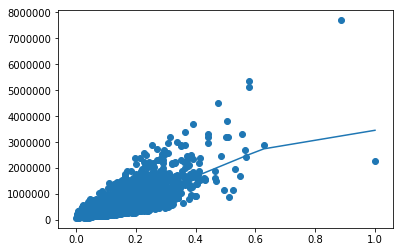

In [189]:
plot_data(X_train_list,Y_train_list,Y_pred)


## Best result achieved with Learning rate: 1

Iterations : 10000 <br />
Last Cost : 38374780528.962669<br />
Second Last Cost : 38374895380.947952<br /> 
Learning rate : 1.000000 <br />
w0 : 148814.076829 <br />
w1 : 2515005.044681<br />
w2 : 3794670.119299<br />
w3 : -182927.837397<br />
w4 : -2817563.714944<br />
Training RMSE : 195894.820067<br />
Validation RMSE : 128888.670561<br />
Testing RMSE : 115067.242611 <br />

## 2-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).
Plot the training data with the fitted line. Using the optimized weights, please calculated Root Mean Squared Error (RMSE) of training and testing data.
Note: Do not forget feature normalization.


In [190]:
X2_new = minmax_normalize(np.power(X,2))
X3_new = minmax_normalize(np.power(X,3))
X4_new = minmax_normalize(np.power(X,4))
X5_new = minmax_normalize(np.power(X,5))
X6_new = minmax_normalize(np.power(X,6))
X7_new = minmax_normalize(np.power(X,7))
X8_new = minmax_normalize(np.power(X,8))
X9_new = minmax_normalize(np.power(X,9))
X10_new = minmax_normalize(np.power(X,10))
X11_new = minmax_normalize(np.power(X,11))
X12_new = minmax_normalize(np.power(X,12))
X13_new = minmax_normalize(np.power(X,13))
X14_new = minmax_normalize(np.power(X,14))
X15_new = minmax_normalize(np.power(X,15))
X16_new = minmax_normalize(np.power(X,16))

In [191]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [1.6]

In [192]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [193]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
    count = 0
    max_count = 1000
    current_cost = calculate_cost(X_train,Y_train)
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(X_train,Y_train)
        calculate_weights(rate,X_train,Y_train)
        new_cost = calculate_cost(X_train,Y_train)
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "w3 : %f" % W_mat[3]
    print "w4 : %f" % W_mat[4]
    print "w5 : %f" % W_mat[5]
    print "w6 : %f" % W_mat[6]
    print "w7 : %f" % W_mat[7]
    print "w8 : %f" % W_mat[8]
    print "w9 : %f" % W_mat[9]
    print "w10 : %f" % W_mat[10]
    print "w11 : %f" % W_mat[11]
    print "w12 : %f" % W_mat[12]
    print "w13 : %f" % W_mat[13]
    print "w14 : %f" % W_mat[14]
    print "w15 : %f" % W_mat[15]
    print "w16 : %f" % W_mat[16]
    print "Training RMSE : %lf" % sqrt(calculate_cost(X_train,Y_train))
    print "Validation RMSE : %lf" % sqrt(calculate_cost(X_val,Y_val))
    print "Testing RMSE : %f" % sqrt(calculate_cost(X_test,Y_test))
    print "\n"

Iterations : 1000
Last Cost : 38267044153.940788
Second Last Cost : 38267701364.602348 
Learning rate : 1.600000 
w0 : 118016.137979 
w1 : 3015301.335410
w2 : 1900764.343344
w3 : 765766.011798
w4 : 186357.980603
w5 : -81680.798105
w6 : -207135.000320
w7 : -268149.724718
w8 : -299023.681177
w9 : -315175.768948
w10 : -323848.907232
w11 : -328599.467459
w12 : -331241.164310
w13 : -332727.416927
w14 : -333571.324954
w15 : -334054.065101
w16 : -334331.897824
Training RMSE : 195619.641534
Validation RMSE : 126727.687114
Testing RMSE : 115024.568709




In [194]:
print "Testing RMSE : %f" % sqrt(calculate_cost(X_test,Y_test)) 
def predict(x,x2_new,x3_new,x4_new,x5_new,x6_new,x7_new,x8_new,x9_new,x10_new,x11_new,x12_new,x13_new,x14_new,x15_new,x16_new): 
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new + float(W_mat[5])*x5_new + float(W_mat[6])*x6_new + float(W_mat[7])*x7_new + float(W_mat[8])*x8_new + float(W_mat[9])*x8_new + float(W_mat[10])*x10_new + float(W_mat[11])*x11_new + float(W_mat[12])*x12_new + float(W_mat[13])*x13_new + float(W_mat[14])*x14_new + float(W_mat[15])*x15_new + float(W_mat[16])*x16_new
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
Y_pred = []
for x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16 in zip(X_train_list,np.power(X_train_list,2),np.power(X_train_list,3),np.power(X_train_list,4),np.power(X_train_list,5),np.power(X_train_list,6),np.power(X_train_list,7),np.power(X_train_list,8),np.power(X_train_list,9),np.power(X_train_list,10),np.power(X_train_list,11),np.power(X_train_list,12),np.power(X_train_list,13),np.power(X_train_list,14),np.power(X_train_list,15),np.power(X_train_list,16)):
    Y_pred.append(predict(x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16))

Testing RMSE : 115024.568709


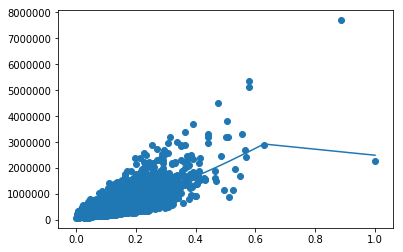

In [195]:
plot_data(X_train_list,Y_train_list,Y_pred)

## Best result achieved with Learning rate: 1.6


Iterations : 1000 <br />
Last Cost : 38267044153.940788<br />
Second Last Cost : 38267701364.602348<br /> 
Learning rate : 1.600000 <br />
Training RMSE : 195619.641534<br />
Validation RMSE : 126727.687114<br />
Testing RMSE : 115024.568709<br />

## 2-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization.
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the training and validation data with the fitted line. Search optimum L2 penalty based on Root Mean Squared Error (RMSE) of validation data. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE) for training/validation/test data.
Note: Do not forget feature normalization.


In [196]:
def calculate_cost(y,X_mat,Y_mat):
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    result += (y/m*np.sum(np.power(W_mat,2)))
    return float(result)

def cost_derivative(y,X_mat,Y_mat):
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    result += 2 * y/m
    return result

def calculate_weights(rate,y,X_mat,Y_mat):
    global W_mat
    W_mat = W_mat - rate*cost_derivative(y,X_mat,Y_mat)

In [206]:
X_mat = np.asmatrix(np.column_stack((temp,X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [1.5]
lambdas = [0.000001,0.001,0.01,0.1,0.5,1,10]

In [207]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [208]:
Weights = []
for rate  in learning_rates:
    for y in lambdas:
        W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
        count = 0
        max_count = 1000
        current_cost = calculate_cost(y,X_train,Y_train)
        new_cost = 0
        while new_cost < current_cost and count < max_count:
            current_cost = calculate_cost(y,X_train,Y_train)
            calculate_weights(rate,y,X_train,Y_train)
            new_cost = calculate_cost(y,X_train,Y_train)
            count += 1
        Weights.append(list(W_mat.T[0].tolist()[0]))
        print "Penalty : %f" % y
        print "Iterations : %d" % count
        print "Last Cost : %lf" % new_cost
        print "Second Last Cost : %f " % current_cost 
        print "Learning rate : %f " % rate
        print "Training RMSE : %lf" % sqrt(calculate_cost(y,X_train,Y_train))
        print "Validation RMSE : %lf" % sqrt(calculate_cost(y,X_val,Y_val))
        print "Testing RMSE : %f" % sqrt(calculate_cost(y,X_test,Y_test)) 
        print "w0 : %f " % W_mat[0]
        print "w1 : %f" % W_mat[1]
        print "w2 : %f" % W_mat[2]
        print "w3 : %f" % W_mat[3]
        print "w4 : %f" % W_mat[4]
        print "w5 : %f" % W_mat[5]
        print "w6 : %f" % W_mat[6]
        print "w7 : %f" % W_mat[7]
        print "w8 : %f" % W_mat[8]
        print "w9 : %f" % W_mat[9]
        print "w10 : %f" % W_mat[10]
        print "w11 : %f" % W_mat[11]
        print "w12 : %f" % W_mat[12]
        print "w13 : %f" % W_mat[13]
        print "w14 : %f" % W_mat[14]
        print "w15 : %f" % W_mat[15]
        print "w16 : %f" % W_mat[16]
        print "\n"
    print "\n********************\n"

Penalty : 0.000001
Iterations : 1000
Last Cost : 38308703380.020905
Second Last Cost : 38309337198.841820 
Learning rate : 1.500000 
Training RMSE : 195726.092742
Validation RMSE : 126935.336170
Testing RMSE : 115104.114733
w0 : 116595.873868 
w1 : 3035400.129910
w2 : 1854164.443659
w3 : 736441.687879
w4 : 174516.232992
w5 : -83768.213062
w6 : -204268.767799
w7 : -262777.724847
w8 : -292361.006726
w9 : -307834.211135
w10 : -316143.646962
w11 : -320696.460765
w12 : -323229.395185
w13 : -324655.289779
w14 : -325465.467936
w15 : -325929.255820
w16 : -326196.393784


Penalty : 0.001000
Iterations : 1000
Last Cost : 38311340865.985359
Second Last Cost : 38311974271.065613 
Learning rate : 1.500000 
Training RMSE : 195732.830322
Validation RMSE : 126945.724840
Testing RMSE : 115115.571121
w0 : 116595.873867 
w1 : 3035400.129929
w2 : 1854164.443636
w3 : 736441.687830
w4 : 174516.232930
w5 : -83768.213130
w6 : -204268.767869
w7 : -262777.724920
w8 : -292361.006799
w9 : -307834.211209
w10 : -31

In [203]:
print "Testing RMSE : %f" % sqrt(calculate_cost(y,X_test,Y_test)) 
def predict(x,x2_new,x3_new,x4_new,x5_new,x6_new,x7_new,x8_new,x9_new,x10_new,x11_new,x12_new,x13_new,x14_new,x15_new,x16_new): 
    return float(W_mat[0]) + float(W_mat[1])*x + float(W_mat[2])*x2_new + float(W_mat[3])*x3_new + float(W_mat[4])*x4_new + float(W_mat[5])*x5_new + float(W_mat[6])*x6_new + float(W_mat[7])*x7_new + float(W_mat[8])*x8_new + float(W_mat[9])*x8_new + float(W_mat[10])*x10_new + float(W_mat[11])*x11_new + float(W_mat[12])*x12_new + float(W_mat[13])*x13_new + float(W_mat[14])*x14_new + float(W_mat[15])*x15_new + float(W_mat[16])*x16_new
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
Y_pred = []
for x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16 in zip(X_train_list,np.power(X_train_list,2),np.power(X_train_list,3),np.power(X_train_list,4),np.power(X_train_list,5),np.power(X_train_list,6),np.power(X_train_list,7),np.power(X_train_list,8),np.power(X_train_list,9),np.power(X_train_list,10),np.power(X_train_list,11),np.power(X_train_list,12),np.power(X_train_list,13),np.power(X_train_list,14),np.power(X_train_list,15),np.power(X_train_list,16)):
    Y_pred.append(predict(x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16))

Testing RMSE : 115104.114733


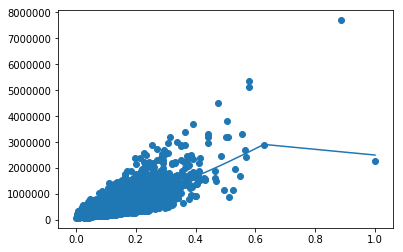

In [204]:
plot_data(X_train_list,Y_train_list,Y_pred)

Text(0.5,1,u'Weight Coefficients')

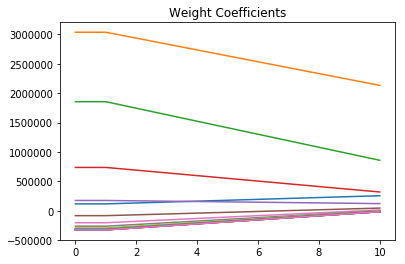

In [209]:
plt.plot(lambdas,Weights)
plt.title("Weight Coefficients")

## Best result achieved with Learning rate: 1.5 and Penalty: 0.000001

Penalty : 0.000001 <br />
Iterations : 1000<br />
Last Cost : 38308703380.020905<br />
Second Last Cost : 38309337198.841820<br /> 
Learning rate : 1.500000 <br />
Training RMSE : 195726.092742<br />
Validation RMSE : 126935.336170<br />
Testing RMSE : 115104.114733<br />

## 2-6. Fit the data using 16th order polynomial regression model with scikit-learn Ridge model.
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE)


In [223]:
X_mat = np.asmatrix(np.column_stack((X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
Y_mat = np.asmatrix((np.row_stack((Y))))
lambdas = [0.001,0.01,0.1,0.5,1,10]

In [224]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [225]:
ridge_model.coef_[0].tolist()

[665765.6753544116,
 8840151.31867511,
 1315529.311467773,
 -2311763.6565368623,
 -3045537.360111652,
 -2847116.0996238044,
 -2311923.551615864,
 -1646165.3806960688,
 -975526.9670156973,
 -377796.7111575216,
 112826.78280068895,
 492863.246710301,
 775178.3043666402,
 978525.6526114416,
 1121630.1119295966,
 1220560.2061928147]

In [226]:
Weights = []
for y in lambdas:
    ridge_model = Ridge(alpha=y)
    ridge_model.fit(X_train,Y_train)
    Y_pred_train = ridge_model.predict(X_train)
    print "For Penalty : %f" % y
    print "Training RMSE is %f " % sqrt(mean_squared_error(Y_train,Y_pred_train))
    Y_pred_val = ridge_model.predict(X_val)
    print "Validation RMSE is %f " % sqrt(mean_squared_error(Y_val,Y_pred_val))
    Y_pred_test = ridge_model.predict(X_test)
    print "Testing RMSE is %f " % sqrt(mean_squared_error(Y_test,Y_pred_test))
    Weights.append(ridge_model.coef_[0].tolist())
    print "******"

For Penalty : 0.001000
Training RMSE is 247033.264775 
Validation RMSE is 291390.622584 
Testing RMSE is 250848.208917 
******
For Penalty : 0.010000
Training RMSE is 247154.313072 
Validation RMSE is 274156.296095 
Testing RMSE is 250494.248332 
******
For Penalty : 0.100000
Training RMSE is 247892.814229 
Validation RMSE is 266771.588713 
Testing RMSE is 250986.546430 
******
For Penalty : 0.500000
Training RMSE is 250264.482379 
Validation RMSE is 275070.845456 
Testing RMSE is 254294.074698 
******
For Penalty : 1.000000
Training RMSE is 252129.041130 
Validation RMSE is 281240.664697 
Testing RMSE is 256812.365615 
******
For Penalty : 10.000000
Training RMSE is 272041.229976 
Validation RMSE is 315040.501230 
Testing RMSE is 279748.466602 
******


In [227]:
print "Optimized weights"
print "w0 : %f" % ridge_model.intercept_
print "w1 : %f" % ridge_model.coef_[0][0]
print "w2 : %f" % ridge_model.coef_[0][1]
print "w3 : %f" % ridge_model.coef_[0][2]
print "w4 : %f" % ridge_model.coef_[0][3]
print "w5 : %f" % ridge_model.coef_[0][4]
print "w6 : %f" % ridge_model.coef_[0][5]
print "w7 : %f" % ridge_model.coef_[0][6]
print "w8 : %f" % ridge_model.coef_[0][7]
print "w9 : %f" % ridge_model.coef_[0][8]
print "w10 : %f" % ridge_model.coef_[0][9]
print "w11 : %f" % ridge_model.coef_[0][10]
print "w12 : %f" % ridge_model.coef_[0][11]
print "w13 : %f" % ridge_model.coef_[0][12]
print "w14 : %f" % ridge_model.coef_[0][13]
print "w15 : %f" % ridge_model.coef_[0][14]
print "w16 : %f" % ridge_model.coef_[0][15]

Optimized weights
w0 : 257876.883126
w1 : 2099831.709608
w2 : 895726.391701
w3 : 322005.646642
w4 : 96915.418437
w5 : 6212.925388
w6 : -32976.216733
w7 : -51165.974260
w8 : -60134.953940
w9 : -64769.088937
w10 : -67248.231829
w11 : -68608.904666
w12 : -69370.021274
w13 : -69801.914621
w14 : -70049.726503
w15 : -70193.176525
w16 : -70276.815866


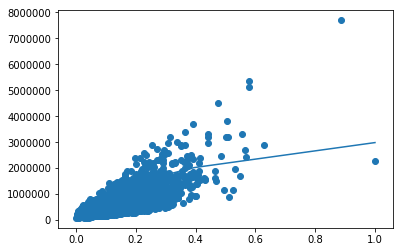

In [228]:
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
plot_data(X_train_list,Y_train_list,Y_pred_train)

Text(0.5,1,u'Weight coefficients')

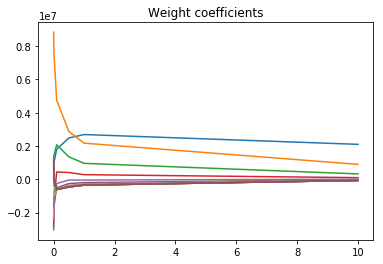

In [229]:
plt.plot(lambdas,Weights)
plt.title("Weight coefficients")

## Best result achieved for penalty : 0.001
For Penalty : 0.001000 <br />
Training RMSE is 247033.264775 <br />
Validation RMSE is 291390.622584 <br />
Testing RMSE is 250848.208917 <br />

## 2-7. Fit the data using 16th order polynomial regression model with scikit-learn Lasso model.
You need to try at least 3 different L1 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE)
Deep Learning, CMPE 258-01, Spring, 2018 Page 3 of 3


In [230]:
X_mat = np.asmatrix(np.column_stack((X,X2_new,X3_new,X4_new,X5_new,X6_new,X7_new,X8_new,X9_new,X10_new,X11_new,X12_new,X13_new,X14_new,X15_new,X16_new)))
Y_mat = np.asmatrix((np.row_stack((Y))))
lambdas = [0.00001,0.00001,0.001,0.01,0.1,0.5,1]

In [231]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=.75)

In [232]:
Weights = []
for y in lambdas:
    lasso_model = Ridge(alpha=y)
    lasso_model.fit(X_train,Y_train)
    Y_pred_train = lasso_model.predict(X_train)
    print "For Penalty : %f" % y
    print "Training RMSE is %f " % sqrt(mean_squared_error(Y_train,Y_pred_train))
    Y_pred_val = lasso_model.predict(X_val)
    print "Validation RMSE is %f " % sqrt(mean_squared_error(Y_val,Y_pred_val))
    Y_pred_test = lasso_model.predict(X_test)
    print "Testing RMSE is %f " % sqrt(mean_squared_error(Y_test,Y_pred_test))
    Weights.append(lasso_model.coef_[0])
    print "******"

For Penalty : 0.000010
Training RMSE is 246926.796974 
Validation RMSE is 515419.686061 
Testing RMSE is 251168.443908 
******
For Penalty : 0.000010
Training RMSE is 246926.796974 
Validation RMSE is 515419.686061 
Testing RMSE is 251168.443908 
******
For Penalty : 0.001000
Training RMSE is 247033.264775 
Validation RMSE is 291390.622584 
Testing RMSE is 250848.208917 
******
For Penalty : 0.010000
Training RMSE is 247154.313072 
Validation RMSE is 274156.296095 
Testing RMSE is 250494.248332 
******
For Penalty : 0.100000
Training RMSE is 247892.814229 
Validation RMSE is 266771.588713 
Testing RMSE is 250986.546430 
******
For Penalty : 0.500000
Training RMSE is 250264.482379 
Validation RMSE is 275070.845456 
Testing RMSE is 254294.074698 
******
For Penalty : 1.000000
Training RMSE is 252129.041130 
Validation RMSE is 281240.664697 
Testing RMSE is 256812.365615 
******


In [233]:
print "Optimized weights"
print "w0 : %f" % lasso_model.intercept_
print "w1 : %f" % lasso_model.coef_[0][0]
print "w2 : %f" % lasso_model.coef_[0][1]
print "w3 : %f" % lasso_model.coef_[0][2]
print "w4 : %f" % lasso_model.coef_[0][3]
print "w5 : %f" % lasso_model.coef_[0][4]
print "w6 : %f" % lasso_model.coef_[0][5]
print "w7 : %f" % lasso_model.coef_[0][6]
print "w8 : %f" % lasso_model.coef_[0][7]
print "w9 : %f" % lasso_model.coef_[0][8]
print "w10 : %f" % lasso_model.coef_[0][9]
print "w11 : %f" % lasso_model.coef_[0][10]
print "w12 : %f" % lasso_model.coef_[0][11]
print "w13 : %f" % lasso_model.coef_[0][12]
print "w14 : %f" % lasso_model.coef_[0][13]
print "w15 : %f" % lasso_model.coef_[0][14]
print "w16 : %f" % lasso_model.coef_[0][15]

Optimized weights
w0 : 152733.737942
w1 : 2689215.825887
w2 : 2171559.712919
w3 : 957449.929432
w4 : 275949.240208
w5 : -48179.228228
w6 : -200798.796796
w7 : -274753.922998
w8 : -311850.352944
w9 : -331030.659962
w10 : -341188.198416
w11 : -346666.440737
w12 : -349661.839278
w13 : -351316.712050
w14 : -352238.208628
w15 : -352754.442531
w16 : -353044.997538


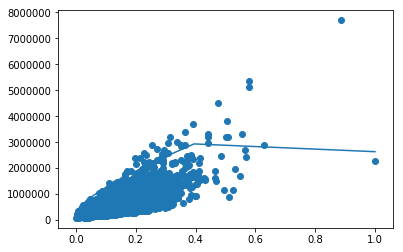

In [234]:
Y_train_list = Y_train.T[0].tolist()[0]
X_train_list = X_train[:,1].T.tolist()[0]
plot_data(X_train_list,Y_train_list,Y_pred_train)

Text(0.5,1,u'Weight coefficients')

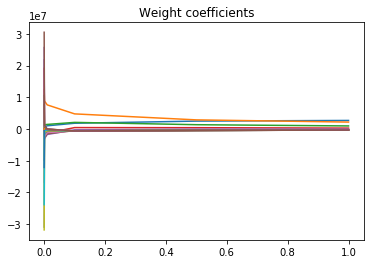

In [235]:
plt.plot(lambdas,Weights)
plt.title("Weight coefficients")

## 3 (40pts). Regularization with Tensorflow
Using Jupyter notebook, load the data (ex2data3.csv).
This is California housing dataset. The original database is available from http://lib.stat.cmu.edu
The data contains 20,640 observations on 9 variables. This dataset contains the average house value as target variable and the following input variables (features): average income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude
(R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\ Statistics and Probability Letters, 33 (1997) 291-297) .
You need to split the data into training/validation/testing data set as 60% / 20% / 20%.
Please use np.random.seed(1) to have consistent data for evaluation.


In [236]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [237]:
m = len(housing.data)
print m

20640


In [238]:
temp = pd.Series( (1 for i in range(0,m)) )

In [239]:
X = housing.data[:,:-1]
X = (X - np.mean(X))/np.std(X,axis=0) # Z-score normalization
#X = minmax_normalize(X) # Min-Max Normalization
Y = housing.data[:,-1]

In [240]:
X_mat = np.asmatrix(np.column_stack((temp,X,np.power(X,2),np.power(X,3),np.power(X,4))))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))


In [241]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_mat,Y_mat,train_size=0.8,test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,train_size=0.75)

## 3-1. Fit the training data using regression model with ridge (L2 penalty) regularization with scikit-learn Ridge model.
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Search optimum L2 penalty based on Root Mean Squared Error (RMSE) of validation data. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE) for training/validation/test data.
Note: Do not forget feature normalization


In [242]:
lambdas = [0.001,0.01,0.1,0.5,1,10]
Weights = []
for y in lambdas:
    ridge_model = Ridge(alpha=y)
    ridge_model.fit(X_train,Y_train)
    Y_pred_train = ridge_model.predict(X_train)
    print "For Penalty : %f" % y
    print "Training RMSE is %f " % sqrt(mean_squared_error(Y_train,Y_pred_train))
    Y_pred_val = ridge_model.predict(X_val)
    print "Validation RMSE is %f " % sqrt(mean_squared_error(Y_val,Y_pred_val))
    Y_pred_test = ridge_model.predict(X_test)
    print "Testing RMSE is %f " % sqrt(mean_squared_error(Y_test,Y_pred_test))
    Weights.append(ridge_model.coef_[0].tolist())

For Penalty : 0.001000
Training RMSE is 0.595994 
Validation RMSE is 1.262650 
Testing RMSE is 0.615572 
For Penalty : 0.010000
Training RMSE is 0.596048 
Validation RMSE is 1.069546 
Testing RMSE is 0.615585 
For Penalty : 0.100000
Training RMSE is 0.596186 
Validation RMSE is 0.982930 
Testing RMSE is 0.615400 
For Penalty : 0.500000
Training RMSE is 0.597573 
Validation RMSE is 0.983680 
Testing RMSE is 0.615853 
For Penalty : 1.000000
Training RMSE is 0.599339 
Validation RMSE is 0.989856 
Testing RMSE is 0.616987 
For Penalty : 10.000000
Training RMSE is 0.606051 
Validation RMSE is 0.985867 
Testing RMSE is 0.622163 


/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.09812343614e-25 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.64937854392e-24 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.6026631313e-23 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition

In [243]:
print "Optimized weights"
print "w0 : %f" % ridge_model.intercept_
print "w1 : %f" % ridge_model.coef_[0][0]
print "w2 : %f" % ridge_model.coef_[0][1]
print "w3 : %f" % ridge_model.coef_[0][2]
print "w4 : %f" % ridge_model.coef_[0][3]
print "w5 : %f" % ridge_model.coef_[0][4]
print "w6 : %f" % ridge_model.coef_[0][5]
print "w7 : %f" % ridge_model.coef_[0][6]
print "w8 : %f" % ridge_model.coef_[0][7]
print "w9 : %f" % ridge_model.coef_[0][8]
print "w10 : %f" % ridge_model.coef_[0][9]
print "w11 : %f" % ridge_model.coef_[0][10]
print "w12 : %f" % ridge_model.coef_[0][11]
print "w13 : %f" % ridge_model.coef_[0][12]
print "w14 : %f" % ridge_model.coef_[0][13]
print "w15 : %f" % ridge_model.coef_[0][14]
print "w16 : %f" % ridge_model.coef_[0][15]

Optimized weights
w0 : -5723.100988
w1 : 0.000000
w2 : 0.000629
w3 : -0.029631
w4 : 0.004126
w5 : -0.000769
w6 : -0.118405
w7 : -0.131393
w8 : 0.020867
w9 : -0.050142
w10 : 0.271262
w11 : -0.169139
w12 : 0.236023
w13 : 0.030443
w14 : -0.000424
w15 : -1.164594
w16 : -0.000279


Text(0.5,1,u'Weight coefficients')

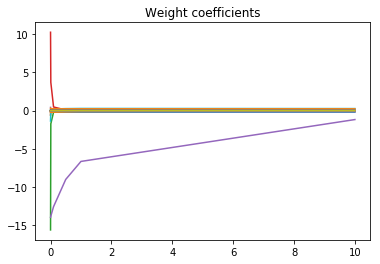

In [244]:
plt.plot(lambdas,Weights)
plt.title("Weight coefficients")

## 3-2. Fit the training data using regression model with lasso (L1 penalty) regularization with scikit-learn Lasso model.
You need to try at least 3 different L1 penalty (for example, λ = 0.1, 1, 10). Search optimum L1 penalty based on Root Mean Squared Error (RMSE) of validation data. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE) for training/validation/test data.
Note: Do not forget feature normalization


In [245]:
lambdas = [0.001,0.01,0.1]
Weights = []
for y in lambdas:
    lasso_model = Lasso(alpha=y)
    lasso_model.fit(X_train,Y_train)
    Y_pred_train = lasso_model.predict(X_train)
    print "For Penalty : %f" % y
    print "Training RMSE is %f " % sqrt(mean_squared_error(Y_train,Y_pred_train))
    Y_pred_val = lasso_model.predict(X_val)
    print "Validation RMSE is %f " % sqrt(mean_squared_error(Y_val,Y_pred_val))
    Y_pred_test = lasso_model.predict(X_test)
    print "Testing RMSE is %f " % sqrt(mean_squared_error(Y_test,Y_pred_test))
    Weights.append(lasso_model.coef_)

For Penalty : 0.001000
Training RMSE is 0.640461 
Validation RMSE is 0.636043 
Testing RMSE is 0.657463 
For Penalty : 0.010000
Training RMSE is 0.643844 
Validation RMSE is 0.637571 
Testing RMSE is 0.661647 
For Penalty : 0.100000
Training RMSE is 0.645881 
Validation RMSE is 0.638607 
Testing RMSE is 0.661652 


In [246]:
print "Optimized weights"
print "w0 : %f" % lasso_model.intercept_
print "w1 : %f" % lasso_model.coef_[0]
print "w2 : %f" % lasso_model.coef_[1]
print "w3 : %f" % lasso_model.coef_[2]
print "w4 : %f" % lasso_model.coef_[3]
print "w5 : %f" % lasso_model.coef_[4]
print "w6 : %f" % lasso_model.coef_[5]
print "w7 : %f" % lasso_model.coef_[6]
print "w8 : %f" % lasso_model.coef_[7]
print "w9 : %f" % lasso_model.coef_[8]
print "w10 : %f" % lasso_model.coef_[9]
print "w11 : %f" % lasso_model.coef_[10]
print "w12 : %f" % lasso_model.coef_[11]
print "w13 : %f" % lasso_model.coef_[12]
print "w14 : %f" % lasso_model.coef_[13]
print "w15 : %f" % lasso_model.coef_[14]
print "w16 : %f" % lasso_model.coef_[15]

Optimized weights
w0 : -83.200804
w1 : 0.000000
w2 : 0.000000
w3 : -0.000000
w4 : -0.000000
w5 : 0.000000
w6 : -0.000000
w7 : -0.000000
w8 : 0.000000
w9 : -0.003616
w10 : 0.000000
w11 : 0.001032
w12 : -0.000848
w13 : -0.000000
w14 : -0.000000
w15 : -0.001740
w16 : -0.000012


Text(0.5,1,u'Weight coefficients')

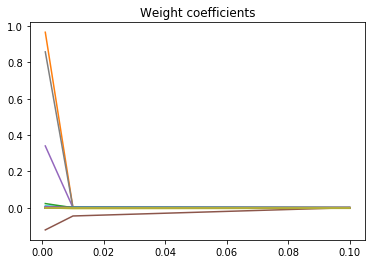

In [247]:
plt.plot(lambdas,Weights)
plt.title("Weight coefficients")

## 3-3. Fit the training data using regression model with ridge (L2 penalty) regularization using TensorFlow.
You need to make gradient descent method instead of open source algorithm.
You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Search optimum L2 penalty based on Root Mean Squared Error (RMSE) of validation data. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE) for training/validation/test data.
Note: Do not forget feature normalization.


In [249]:
x = tf.placeholder(tf.float32,[None,X_train.shape[1]])
y = tf.placeholder(tf.float32,[None,1])

In [251]:
w = tf.zeros([len(housing.data[0])+1, 1], tf.float32) 
lamb = 0.1
rate = 1
y_pred = tf.matmul(x, w)
error = y_pred - y
rmse = tf.sqrt(tf.reduce_mean(tf.square(error), name="rmse"))
cost = tf.add(rmse, (y/m)* tf.reduce_sum(tf.square(w)))
gradients = (2/m)*tf.add(tf.matmul(tf.transpose(x), error), (y*w))
get_new_weights = tf.assign(w, w - rate*gradients)

learning_rates = [0.0001,0.001,0.01,0.1,1]
lambdas = [0.01,0.1,0.5,1,10]
Weights = []

n_epochs = 1000
init = tf.global_variables_initializer()
with tf.Session() as sess:
    for epoch in range(n_epochs):
        sess.run(get_new_weights, feed_dict={X:X_train, Y:Y_train})
        if epoch % 100 == 0:
            print("Epoch", epoch, "RMSE =", rmse.eval())    
    Y_pred_train = sess.run(y_pred, feed_dict={X: X_train})
    train_rmse = math.sqrt(sess.run(rmse, feed_dict={X:X_train, Y:Y_train}))
    Y_pred_val = sess.run(y_pred, feed_dict={X: X_valid_tf})
    val_rmse = math.sqrt(sess.run(rmse, feed_dict={X:X_val, Y:Y_val}))
    print "Training RMSE is : %f" % train_rmse
    print "Validation RMSE is : %f " % val_rmse

ValueError: Dimensions must be equal, but are 29 and 9 for 'MatMul' (op: 'MatMul') with input shapes: [?,29], [9,1].

## 3-4. Fit the training data using regression model with lasso (L1 penalty) regularization using TensorFlow.
You need to make gradient descent method instead of open source algorithm.
You need to try at least 3 different L1 penalty (for example, λ = 0.1, 1, 10). Search optimum L1 penalty based on Root Mean Squared Error (RMSE) of validation data. Print optimized weight coefficients. Plot weight coefficients with L2 penalty. Print Root Mean Squared Error (RMSE) for training/validation/test data.
Note: Do not forget feature normalization.